In [88]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

### Test Code

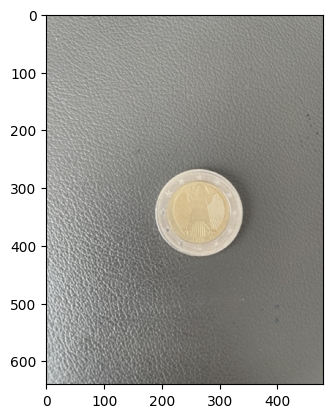

In [83]:
### Test code to open .jpeg file
img = Image.open("/Users/jonastheobald/Desktop/pictures/jpg/Mittel (IMG_2374).jpeg")
img.convert("RGB")
img.save("/Users/jonastheobald/Desktop/pictures/bmp/testfile.bmp", format = "BMP")

img_bmp = Image.open("/Users/jonastheobald/Desktop/pictures/bmp/testfile.bmp")

### Convert the Image object to a Numpy array

# Save Numpy array in the 'img_array' variable
img_array = None

img_array = np.array(img_bmp)

plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)

img_array.resize(28,28)
#plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)


In [84]:
def rescale_to_box(input_file, output_file=None, box_size=(80, 80), to_grayscale=False):
    """
    Rescale an image to fit inside `box_size` while preserving aspect ratio.
    The result will be smaller or equal to the box in both dimensions.
    """
    if output_file is None:
        output_file = input_file  # overwrite original

    with Image.open(input_file) as img:
        # Optional grayscale conversion
        if to_grayscale:
            img = img.convert("L")
        else:
            if img.mode not in ("RGB", "L"):
                img = img.convert("RGB")

        # Rescale keeping aspect ratio
        img.thumbnail(box_size, Image.Resampling.LANCZOS)

        # Save as BMP
        img.save(output_file, format="BMP")

    print(f"Rescaled {input_file} -> {output_file} (max {box_size[0]}x{box_size[1]} pixels)")


In [89]:
def rescale_to_box_dir(input_dir, output_dir, box_size=(80, 80), to_grayscale=False):
    """
    Iterate through all images in `input_dir`, rescale them to fit inside `box_size`
    while preserving aspect ratio, and save as BMP in `output_dir`.
    """
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    supported_exts = (".jpg", ".jpeg", ".png", ".bmp")  # add more if needed

    for file in sorted(input_dir.iterdir()):
        if file.suffix.lower() not in supported_exts:
            continue

        try:
            with Image.open(file) as img:
                # Optional grayscale conversion
                if to_grayscale:
                    img = img.convert("L")
                else:
                    if img.mode not in ("RGB", "L"):
                        img = img.convert("RGB")

                # Rescale keeping aspect ratio
                img.thumbnail(box_size, Image.Resampling.LANCZOS)

                # Output file path (always .bmp)
                out_name = file.stem + ".bmp"
                out_path = output_dir / out_name

                img.save(out_path, format="BMP")
                print(f"Rescaled {file.name} -> {out_name}")

        except Exception as e:
            print(f"⚠️ Skipping {file.name}: {e}")

    print(f"\n✅ Done! Rescaled BMP files saved to: {output_dir}")

Rescaled /Users/jonastheobald/Desktop/pictures/bmp/testfile.bmp -> /Users/jonastheobald/Desktop/pictures/bmp/testfile2.bmp (max 80x80 pixels)


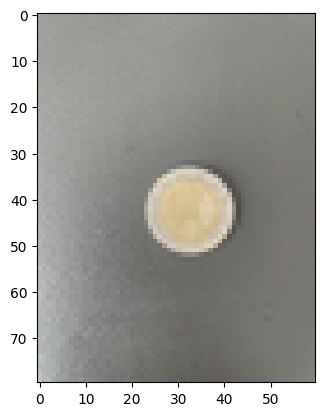

In [85]:
### Test code to check rescaling function
rescale_to_box("/Users/jonastheobald/Desktop/pictures/bmp/testfile.bmp", "/Users/jonastheobald/Desktop/pictures/bmp/testfile2.bmp")
img_bmp = Image.open("/Users/jonastheobald/Desktop/pictures/bmp/testfile2.bmp")

### Convert the Image object to a Numpy array

# Save Numpy array in the 'img_array' variable
img_array = None

img_array = np.array(img_bmp)

plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)

In [90]:
### Execute function to change image format
rescale_to_box_dir("/Users/jonastheobald/Desktop/pictures/jpg/", "/Users/jonastheobald/Desktop/pictures/bmp/")

Rescaled Mittel (IMG_2374).jpeg -> Mittel (IMG_2374).bmp
Rescaled Mittel (IMG_2375).jpeg -> Mittel (IMG_2375).bmp
Rescaled Mittel (IMG_2376).jpeg -> Mittel (IMG_2376).bmp
Rescaled Mittel (IMG_2377).jpeg -> Mittel (IMG_2377).bmp
Rescaled Mittel (IMG_2378).jpeg -> Mittel (IMG_2378).bmp
Rescaled Mittel (IMG_2379).jpeg -> Mittel (IMG_2379).bmp
Rescaled Mittel (IMG_2380).jpeg -> Mittel (IMG_2380).bmp
Rescaled Mittel (IMG_2381).jpeg -> Mittel (IMG_2381).bmp
Rescaled Mittel (IMG_2382).jpeg -> Mittel (IMG_2382).bmp
Rescaled Mittel (IMG_2383).jpeg -> Mittel (IMG_2383).bmp
Rescaled Mittel (IMG_2384).jpeg -> Mittel (IMG_2384).bmp
Rescaled Mittel (IMG_2385).jpeg -> Mittel (IMG_2385).bmp
Rescaled Mittel (IMG_2386).jpeg -> Mittel (IMG_2386).bmp
Rescaled Mittel (IMG_2387).jpeg -> Mittel (IMG_2387).bmp
Rescaled Mittel (IMG_2388).jpeg -> Mittel (IMG_2388).bmp
Rescaled Mittel (IMG_2389).jpeg -> Mittel (IMG_2389).bmp
Rescaled Mittel (IMG_2390).jpeg -> Mittel (IMG_2390).bmp
Rescaled Mittel (IMG_2391).jpeg